# Introduction

Museums are important spaces for artists, as they can bring many opportunities through the celebration, exposure, and preservation of their work to the public. People from all around the world travel to the U.S. to visit major art museums and see art pieces that are exclusively shown in America. The U.S. is considered to be a large influence in shaping the art world and changing the way people perceive art, as the nation’s individualist values open the floor to new ideas and the deconstruction and reevaluation of old systems and traditional thought processes. 
   
However, it is important to note that historically, the art world has been criticized for its lack of diversity in artist representation in museums—with the representation of artists in U.S. museums being predominately Caucasian and male. This can be traced back to the world’s tumultuous history of systemic issues put in place by colonialism and imperialism. Although centuries ago, these issues heavily contributed to the social, political, and economic disparities visible in the global hierarchy today. Colonization and imperialism are responsible for the euro-centric standards that artists are often subjected to, as people of color and other marginalized communities face extra barriers to displaying and preserving their work in museums. While there has been an active push for museums in the U.S. to become more inclusive and representative of the various cultures and backgrounds that make up the United States as well as the world, there is still much work to be done to empower artists and celebrate diversity in the art world.

This project uses data from the paper "Diversity of Artists in Major U.S. Museums" by Topaz, Klingenberg, Turek, Heggeseth, Harris, Blackwood, Chavoya, Nelson, and Murphy to explore the representation of artists in U.S. museums and analyze how history directly impacts diversity in the art world today.

# Exploratory Data Analysis

Using data from the paper "Diversity of Artists in Major U.S. Museums" by Topaz, Klingenberg, Turek, Heggeseth, Harris, Blackwood, Chavoya, Nelson, and Murphy, I scraped data from 18 major U.S. museums found on publicly accessible websites and found about 10,000 artist records. Before scraping, the research article's Terms of Service stated that their data could be used for research purposed and duplicated. Pandas was used to clean the data and replaced null values with placeholders for unknown data. NaNs were present in all data columns (artist, museum, gender, ethnicity, GEO3major, and year) and replaced with “unknown.” 

Visualizations were created with Pandas, Maplotlib, and Seaborn. 

In [2]:
# importing data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/artofstat/ArtistDiversity/master/artistdata.csv')
df

,artist,museum,gender,ethnicity,GEO3major,year
0,Kikugawa Eishin (Hideyoshi),Art Institute of Chicago,NaN,asian,Asia and the Pacific,NaN
1,Gordon C. Abbott,Art Institute of Chicago,man,white,North America,1880.0
2,Sigmund Abeles,Art Institute of Chicago,man,white,North America,1930.0
3,Albrecht Adam,Art Institute of Chicago,man,white,Europe,1790.0
4,Architects David Adler,Art Institute of Chicago,man,white,NaN,1880.0
...,...,...,...,...,...,...
10103,Magnus Zeller,Yale University Art Gallery,man,white,Europe,1890.0
10104,Sun Zhi,Yale University Art Gallery,man,asian,Asia and the Pacific,NaN
10105,Rufus Fairchild Zogbaum,Yale University Art Gallery,man,white,North America,1850.0
10106,Anders Leonard Zorn,Yale University Art Gallery,man,white,Europe,1860.0


In [4]:
#importing seaborn to notebook
import seaborn as sns

In [5]:
df.describe()

,year
count,8026.000000
mean,1865.613008
std,123.300324
min,-400.000000
25%,1830.000000
50%,1900.000000
75%,1940.000000
max,1990.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   artist     10108 non-null  object 
 1   museum     10108 non-null  object 
 2   gender     9016 non-null   object 
 3   ethnicity  8296 non-null   object 
 4   GEO3major  8432 non-null   object 
 5   year       8026 non-null   float64
dtypes: float64(1), object(5)
memory usage: 473.9+ KB


In [9]:
# unique values comment
df['gender'].unique()

array([nan, 'man', 'woman'], dtype=object)

In [11]:
df['ethnicity'].unique()

array(['asian', 'white', nan, 'hispanic', 'other', 'black'], dtype=object)

Data cleaning: replacing NaNs with 'unknown' :

In [13]:
# are there null values?
df.isna().any()

artist       False
museum       False
gender        True
ethnicity     True
GEO3major     True
year          True
dtype: bool

In [15]:
# null values
df.isna(). sum()

artist          0
museum          0
gender       1092
ethnicity    1812
GEO3major    1676
year         2082
dtype: int64

In [17]:
# columns with null values
df.isna().any().sum()

4

In [19]:
df.dropna(subset=['gender'], inplace = True)

In [20]:
# Prints out all rows that have NaN in gender column
df[df['gender'].isna()]

,artist,museum,gender,ethnicity,GEO3major,year


In [22]:
df['gender'].fillna(value='unknown', inplace=True)

In [23]:
# Now no gender value is null
df[df['gender'].isna()]

,artist,museum,gender,ethnicity,GEO3major,year


In [25]:
df.loc[[2053]]

,artist,museum,gender,ethnicity,GEO3major,year
2053,Rockwell Kent,Detroit Institute of Arts,man,white,North America,1880.0


In [27]:
# count of male artists
df.loc[df['gender']=='man', 'artist'].count()

7865

In [29]:
# count of female artists
df.loc[df['gender']=='woman', 'artist'].count()

1151

In [31]:
#Dataframe from groupby/counting
x = df.groupby(['gender','ethnicity'])['artist'].count()
x = x.to_frame().reset_index().rename(columns={'artist':'artistcount'})
gecounts = df.groupby(['gender','ethnicity'])['gender'].count()
gecounts

gender  ethnicity
man     asian         538
        black          87
        hispanic      193
        other          67
        white        5805
woman   asian          38
        black          33
        hispanic       20
        other          35
        white         841
Name: gender, dtype: int64

In [33]:
x

,gender,ethnicity,artistcount
0,man,asian,538
1,man,black,87
2,man,hispanic,193
3,man,other,67
4,man,white,5805
5,woman,asian,38
6,woman,black,33
7,woman,hispanic,20
8,woman,other,35
9,woman,white,841


Text(0.5, 1.0, 'Distribution values for ethnicity column')

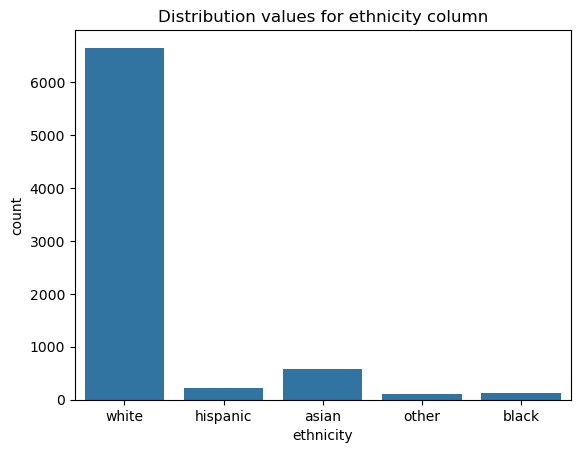

In [35]:
# plot of distribution values for ethnicity column
sns.countplot(data=df, 
            x='ethnicity')
plt.title('Distribution values for ethnicity column')

It can be observed that white artists significantly outnumber the artists from other ethnicities.

/tmp/ipykernel_20/1714272471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


Text(0.5, 1.0, 'Distribution values for gender column')

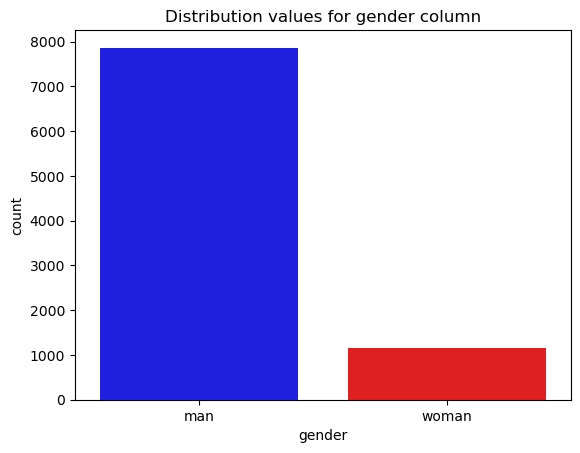

In [37]:
# plot of distribution values for gender column
sns.countplot(data=df, 
            x='gender',
             palette = ['blue', 'red'])
plt.title('Distribution values for gender column')

There is a disproportinate ratio of male artists compared to female artists in U.S. museums.

Text(0.5, 1.0, 'Distribution values for GEO3 major column')

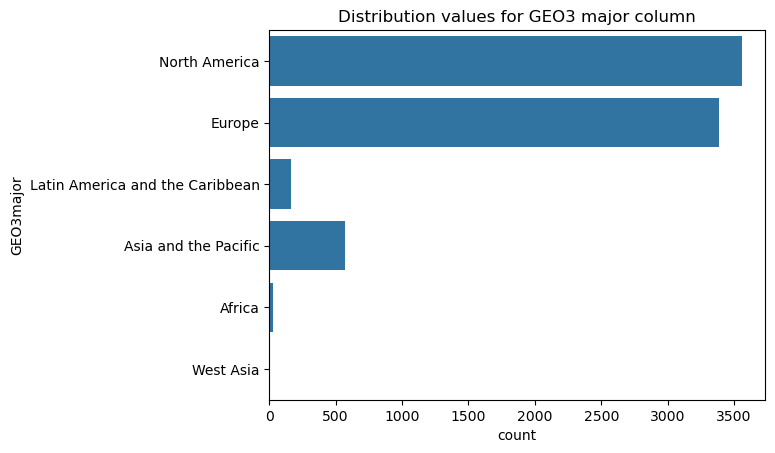

In [39]:
# plot of distribution values for GEO3 column
sns.countplot(data=df, 
            y='GEO3major')
plt.title('Distribution values for GEO3 major column')

Most artists in U.S. museums originate from North America and Europe. Asia and the Pacific is the third-most abundant region of artists, but there is a large gap from North America and Europe to Asia and the Pacific.

# Analysis

The dataset revealed several factors that influenced the representation of artists in U.S. museums. Gender, ethnicity, and year all play a large role in which artists receive exposure in museums. The patterns and data trends demonstrated the different levels of artist diversity at each U.S. museum. 

Text(0.5, 1.0, 'Histogram of Artists in U.S. Museums from 1500-2000')

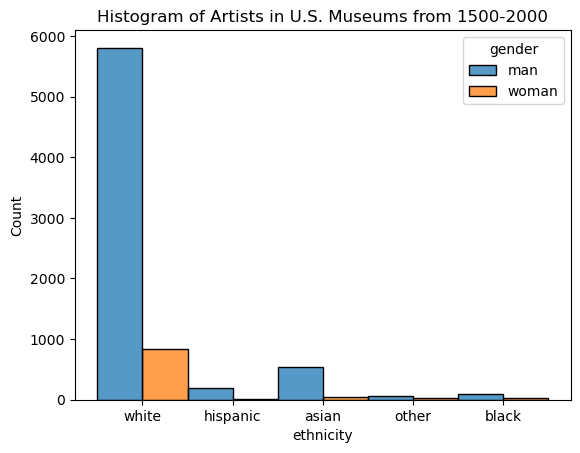

In [41]:
sns.histplot(data=df, 
            x='ethnicity',
            hue='gender', 
             bins=10,
             multiple='dodge')
plt.title('Histogram of Artists in U.S. Museums from 1500-2000')

This histogram clearly shows the domination of white artists in U.S. museums from 1500-2000. Out of all data collected, male artists make up apporximately 87.4% of all artists in U.S. museums. White male artists make up about 75.8% of all artists and white female artists make up about 11% of the same population for a total of almost 87% white artists. It is also notable to observe how people of color are significantly underrepresented compared to white artists, as Asian, Hispanic, and Black artist data combined  made up a total of 13% of all artists from 1500-2000. Female artists also recieved far less opportunities from museums than male artists, only making up about 12.6% of all artists over the span of over 400 years. 

In [43]:
# percentage of male artists
x.loc[x['gender']=='man', 'artistcount'].sum() / x['artistcount'].sum()

0.8737103304166123

In [45]:
# percentage of female artists
x.loc[x['gender']=='woman', 'artistcount'].sum() / x['artistcount'].sum()

0.12628966958338775

In [47]:
# percentage of male white artists
x.loc[(x['gender']=='man') & (x['ethnicity']=='white'),'artistcount'].sum() / x['artistcount'].sum()

0.7581298158547735

In [49]:
# percentage of female white artists
x.loc[(x['gender']=='woman') & (x['ethnicity']=='white'),'artistcount'].sum() / x['artistcount'].sum()

0.10983413869661747

In [51]:
# percentage of white artists
x.loc[x['ethnicity']=='white', 'artistcount'].sum() / x['artistcount'].sum()

0.8679639545513909

Text(0.5, 1.0, 'Histogram of Asian Male & Female Artists in U.S. Museums from 1930-1990')

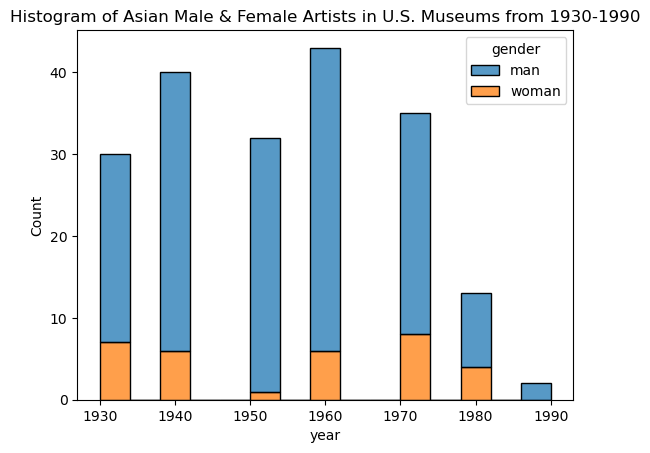

In [53]:
#Comparison of Asian women to Asian men (percentage); 2nd most dominant ethnicity
sns.histplot(data=df[(df['ethnicity']=='asian') &
                    (df['year']>1925)], 
            x='year',
            hue='gender',
             bins=15,multiple='stack')
plt.title('Histogram of Asian Male & Female Artists in U.S. Museums from 1930-1990')

This histogram demonstrates the amount of female Asian artists in comparison to male Asian artists from 1930-1990. In total, Asian male artists made up 0.05% of the entire collection of data and Asian women made up less than 0.01%. The histograpm shows how the proportion of Asian female to Asian male artists is never greater than 1/3, with a significant decrease in women artists in the 1950s and after 1980. 

In [55]:
# % of Asian female artists from 1930-1990
df.loc[(df['gender']=='woman') & (df['ethnicity']=='asian') &
       (df['year']>1900) & 
       (df['year']<2000), 'artist'].count() / df.loc[(df['year']>1900) & 
       (df['year']<2000), 'artist'].count()

0.008716970852628712

In [57]:
# % of Asian female artists from 1930-1990
df.loc[(df['gender']=='woman') & (df['ethnicity']=='asian') &
       (df['year']>1930) & 
       (df['year']<1980), 'artist'].count() / df.loc[(df['year']>1930) & 
       (df['year']<1980), 'artist'].count()

0.009489380930863081

In [59]:
# % of Asian male artists from 1930-1990
df.loc[(df['gender']=='man') & (df['ethnicity']=='asian') &
       (df['year']>1900) & 
       (df['year']<2000), 'artist'].count() / df.loc[(df['year']>1900) & 
       (df['year']<2000), 'artist'].count()

0.053936257150640154

In [61]:
# % of Asian female artists from 1930-1950
df.loc[(df['gender']=='woman') & (df['ethnicity']=='asian') &
       (df['year']>1900) & 
       (df['year']<1950), 'artist'].count() / df.loc[(df['year']>1900) & 
       (df['year']<1950), 'artist'].count()

0.0063882063882063885

Text(0.5, 1.0, 'Histogram of Asian Women Artists in U.S. Museums from 1930-1990')

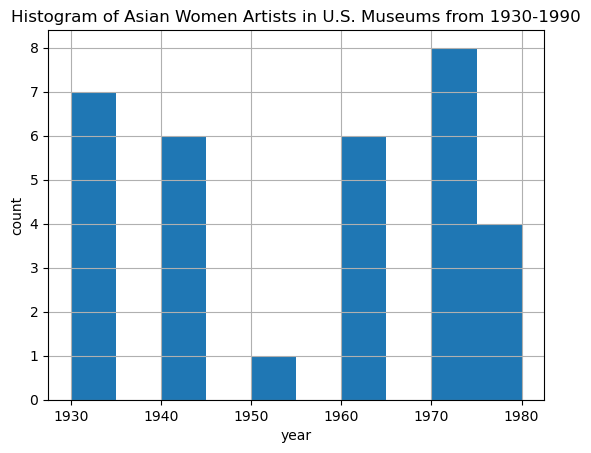

In [63]:
sup = df.loc[(df['gender']=='woman') & (df['ethnicity']=='asian'), 
       'year'].hist()
sup.set(xlabel='year', ylabel='count')
plt.title('Histogram of Asian Women Artists in U.S. Museums from 1930-1990')

As seen above, while representation of female Asian artists was relatively stable (with the exception of the year 1950), the demographic only made up 0.009% of all artists from 1930-1980.

In [65]:
# % of Asian female artists from 1930-1990
df.loc[(df['gender']=='woman') & (df['ethnicity']=='asian') &
       (df['year']>1900) & 
       (df['year']<2000), 'artist'].count() / df.loc[(df['year']>1900) & 
       (df['year']<2000), 'artist'].count()

0.008716970852628712

Text(0.5, 1.0, 'Histogram of Black Artists in U.S. Museums from 1840-1990')

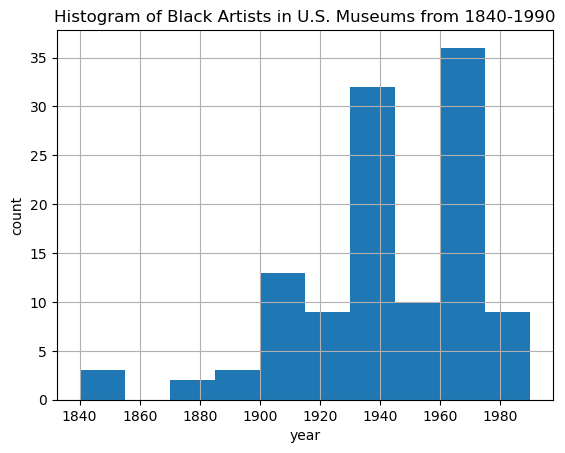

In [67]:
# black artists: most underrepresented ehtnicity
sup=df.loc[ (df['ethnicity']=='black'), 
       'year'].hist()
sup.set(xlabel='year', ylabel='count')
plt.title('Histogram of Black Artists in U.S. Museums from 1840-1990')

This histogram focuses on the most underrpresented ethnic group in U.S. museums, the black population. Out of the 166 black artists featured in U.S. museums from 1840-1990, only 32 women; or about 28% were female black artists.

In [69]:
# total count of female black artists
df.loc[(df['gender']=='woman') & (df['ethnicity']=='black') & 
       (df['year']>1830) & 
       (df['year']<1990), 'artist'].count()

32

In [71]:
#total black population 1840-1990
df.loc[(df['ethnicity']=='black') & 
       (df['year']>1830) & 
       (df['year']<1990), 'artist'].count()

116

In [73]:
#percentage of black women out of black population
df.loc[(df['gender']=='woman') & (df['ethnicity']=='black') & 
       (df['year']>1830) & 
       (df['year']<1990), 'artist'].count()/ df.loc[(df['ethnicity']=='black') & (df['year']>1830) & 
       (df['year']<1990), 'artist'].count()

0.27586206896551724

Text(0.5, 0.98, "Artists' Geographical Origin")

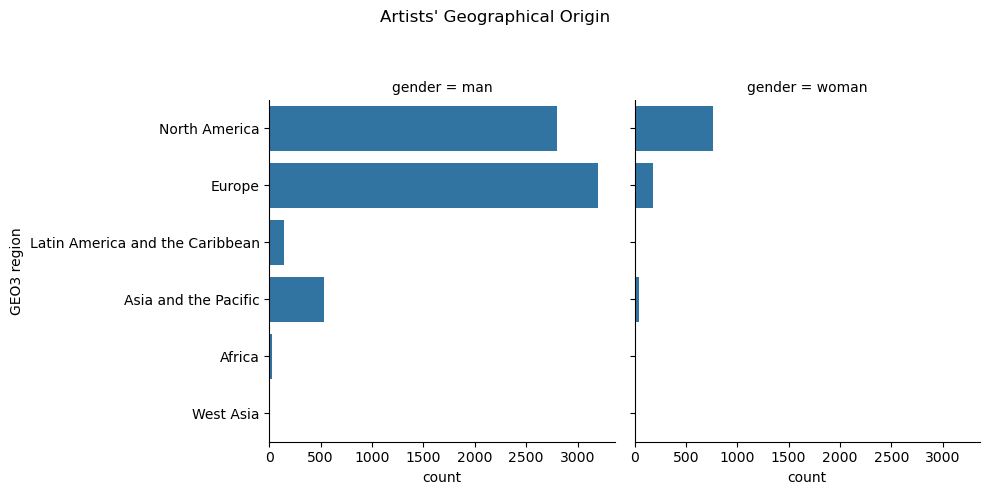

In [75]:
# Artists' geographic origin 
sup = sns.catplot(data=df, 
            y='GEO3major',
            col='gender', 
            kind='count')
sup.set(xlabel='count', ylabel='GEO3 region')
sup.fig.subplots_adjust(top=.8)
sup.fig.suptitle("Artists' Geographical Origin")

This categorical plot shows the geographic location of national and international artists in U.S. museums from years 1500-2000 specific to artist gender. North American artists make up approximately 43.2% of the population and the second greatest demographic of artists are European artists, who make up about 39% of the population. Artists from Asia and the Pacific, Latin America and the Caribbean, West Asia, and Africa were noticibly less represented in major U.S. museums. Similar to other visualizations created from this dataset, male artists have a significantly greater quantity than female artists in U.S. museums.

In [77]:
# count of North American Artists
df.loc[(df['GEO3major']=='North America') & 
       (df['year']>1500) & 
       (df['year']<2000), 'artist'].count()

3145

In [79]:
# % of North American Artists from 1500-2000
df.loc[(df['GEO3major']=='North America') & 
       (df['year']>1500) & 
       (df['year']<2000), 'artist'].count() / df.loc[(df['year']>1500) & 
       (df['year']<2000), 'artist'].count()

0.43188684427355123

In [81]:
# count of European Artists
df.loc[(df['GEO3major']=='Europe') & 
       (df['year']>1500) & 
       (df['year']<2000), 'artist'].count()

2843

In [83]:
# % of European Artists from 1500-2000
df.loc[(df['GEO3major']=='Europe') & 
       (df['year']>1500) & 
       (df['year']<2000), 'artist'].count() / df.loc[(df['year']>1500) & 
       (df['year']<2000), 'artist'].count()

0.3904147212304312

Text(0.5, 1.0, 'Histogram of North American Artists in U.S. Museums from 1650-2000')

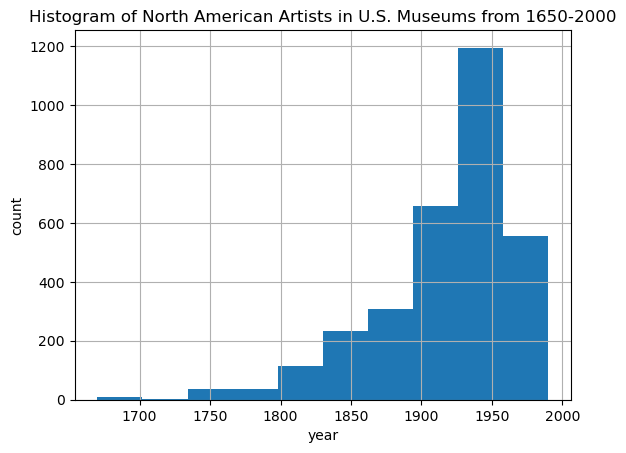

In [85]:
# North American Artists in U.S. Museums 1650-2000
sup=df.loc[(df['GEO3major']=='North America'),'year'].hist()
sup.set(xlabel='year', ylabel='count')
plt.title('Histogram of North American Artists in U.S. Museums from 1650-2000')

From 1750 to 1950, there was a steady increase in artists from North America being showcased at U.S. museums. The peak was around 1925 to 1950, then the quantity of artists rapidly dropped in the next 50 years.

Text(0.5, 1.0, "Artists' Geographic Origin (1500-1900)")

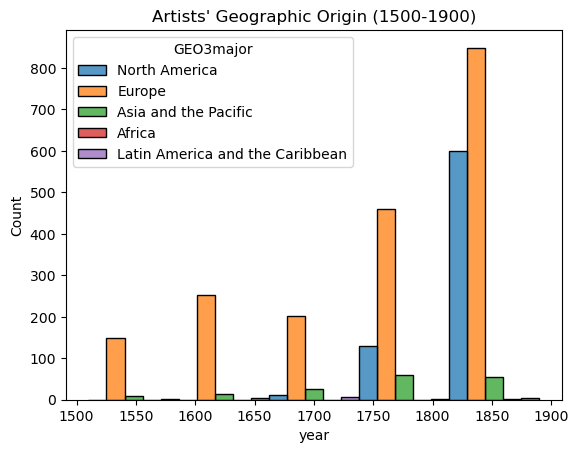

In [87]:
#'Artists' Geographic Origin (1500-1900)
sns.histplot(data=df[(df['year']>1500)&(df['year']<1900)], 
            x='year',
            hue='GEO3major',
             bins=5,multiple='dodge')
plt.title("Artists' Geographic Origin (1500-1900)")

This graph demonstrates the strong presence of European artists in U.S. museums, as European artists dominate the other populations and maintain a steady increase in quantity each year.

Text(0.5, 1.0, "Artists' Geographic Origin (1910-1990)")

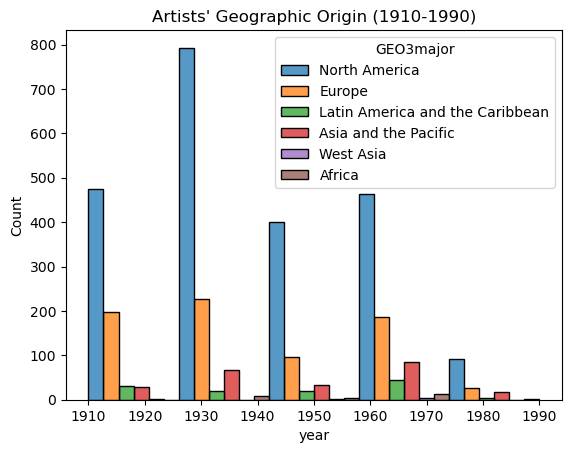

In [89]:
#'Artists' Geographic Origin (1910-1900)
sns.histplot(data=df[(df['year']>1900)], 
            x='year',
            hue='GEO3major',
             bins=5,multiple='dodge')
plt.title("Artists' Geographic Origin (1910-1990)")

This graph focuses on artists' geogrpahic origins, specifically from 1910 to 1990. Unlike the other graph "Artists' Geographic Origin (1500-1900)," North American artists have a higher quantity than European artists or any other geographic region.

# Discussion

After using over 10,000 records of data to study artist diversity in U.S. museums based on gender, ethnicity, geographic origin, and birth decade, it can be determined that white men were by far the most prominent demographic of artists in the dataset. White male artists make up 75.8% of artists in the data pool, this can be attributed to euro-centric values such as the patriarchy and racial standards that influenced the Western hemisphere to become dominated by white men in almost every social and political sector. During the time period the data from this dataset was collected (1500-2000), it is evident that people of color and women did not have many opportunities to showcase their art or even break out of traditional societal roles enforced by the patriarchy. The "Histogram of Artists in U.S. Museums from 1500-2000" demonstrates the lack of social equity for non-white ethnicities and women, as the graph shows how Asian, Hispanic, and Black artist data combined only made up 13% of all artists in U.S. museums during a timespan of 400 years.

However, this project has some limitations, as some data was missing values, and time periods were approximated. In addition, the gender category only considers two genders—male and female, so some data in the 1900s may not be completely accurate or exclude demographics of other gender identities. In regards to ethnicity catergories, there is no representation for Native Americans or mixed people. The dataset did not contain data from the 2000s, so the progressive efforts in racial and gender equality within the last few decades are less evident in this project.

It is also interesting to note how trends in artist diversity in this dataset are a stark contrast from recent art movements in the last decade. In the 'Geographical Artist Origin' graph, the second greatest demographic of artists in U.S. museums being European artists (39%) could be correlated to the influence of European power in the United States, as much of the modern-day country is shaped by a history of European colonization. Additionally, this data is collected from only major U.S. museums, so more “radical” museums are not included. It can also be noted that social media and other independent news outlets have contributed to the resurgence of museums and the types of artists that occupy them.

Political and social movements such as the Black Lives Matter movement after the unjust police killing of George Floyd have changed the art world and made museums acknowledge racial injustice within their institutions. These movements put pressure on institutions that have practiced systemic racism for years to make changes that would increase diversity and inclusion in their content and workplace. Some initiatives that museums have taken to work towards artist inclusivity are hiring diversity and inclusion directors (seen in New York, Washington, DC, Boston, Seattle, San Francisco, St Louis, and Toledo museums), as well as hiring consultants to lead anti-racism staff training and form workplace discrimination policies to empower employees (Kenney). While these initiatives are contributing to massive improvements in artist representation and the uplifting of historically marginalized communities, the work is difficult and taxing. According to Finkel, positions such as consultants are intended to help museums become more diverse, but it can feel overwhelming and be too much for just one individual to be in charge of.
Today, people seem to value transparency and the truth, which are both essential to increasing diversity and cultivating a more inclusive world for others. Museums are more than just collections of historical ephemera or an artist’s past work—these spaces serve as educational institutions that provide insight into various ideals and values that have the potential to empower individuals. Unlearning social and political biases through the power of art can incredibly change the way society operates, but it cannot be done if artists are not given the platform to do so.

# References

1. Artofstat. (2019). Artofstat/artistdiversity: Supplementary files for "artist diversity in major US art museums" by topaz et al.. GitHub. Retrieved March 31, 2023, from https://github.com/artofstat/ArtistDiversity 
2. Finkel, J. (2021, September 28). Meet the experts who root out racism and exclusion in the Arts. The Art Newspaper - International art news and events. Retrieved March 31, 2023, from https://www.theartnewspaper.com/2021/01/11/meet-the-experts-who-root-out-racism-and-exclusion-in-the-arts 
3. Kenney, N. (2021, September 28). Exclusive survey: What progress have us museums made on diversity, after a year of racial reckoning? The Art Newspaper - International art news and events. Retrieved March 31, 2023, from https://www.theartnewspaper.com/2021/05/25/exclusive-survey-what-progress-have-us-museums-made-on-diversity-after-a-year-of-racial-reckoning 
4. Topaz, Chad M., Bernhard Klingenberg, Daniel Turek, Brianna Heggeseth, Pamela E. Harris, Julie C. Blackwood, C. Ondine Chavoya, Steven Nelson, and Kevin M. Murphy. 2019. “‘Diversity of Artists in Major U.S. Museums’. Edited by Christopher M. Danforth.” PLOS ONE 14 (3): e0212852. doi:10.1371/journal.pone.0212852. [Crossref], [PubMed], [Web of Science ®], [Google Scholar]